In [5]:
# importing libraries
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import tweepy
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from dotenv import load_dotenv
from pprint import pprint

In [6]:
#importing api codes from env
load_dotenv('twitter.env')
consumer_key= os.getenv('consumer_key')
consumer_secret=os.getenv('consumer_secret')
access_token=os.getenv('access_token')
access_token_secret=os.getenv('access_token_secret')


In [7]:
#setting up api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [8]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  #housingmarket
Please enter how many tweets to analyze:  1000


In [ ]:
#prints tweets founds
#tweet_list

In [10]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_tweet = pd.DataFrame(neutral_list)
negative_tweet = pd.DataFrame(negative_list)
positive_tweet = pd.DataFrame(positive_list)
print("total number:" ,len(tweet_list))
print("positive number: ",len(positive_tweet))
print("negative number: ", len(negative_tweet))
print("neutral number: ",len(neutral_tweet))

total number: 1000
positive number:  296
negative number:  311
neutral number:  393


In [11]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

In [12]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|(\d+[⁰]+-9A-Za-z \t])|(\w+://\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(4)

,0,text
0,RT @AlmostHomeFL: Seniors: Top 5 Mistakes to A...,seniors: top 5 mistakes to avoid when downsiz...
1,https://t.co/caQ99Wsdrh ‼ Open House! 1-3 TODA...,‼ open house! 1-3 today 🏡\n\n🌴 you will fall...
2,Why We're Not Headed for a Housing Crash\n\nTo...,why we're not headed for a housing crash\n\nto...
3,#theschmiedergroup #coldwellbanker #TSG #home ...,#theschmiedergroup #coldwellbanker #tsg #home ...


In [14]:
#turns list into str to be able create WC
tweet_string=''.join(tweet_list['text'])


In [27]:
# code to find frequency of each word
def freq(_str):
    freq_dict={}
    
# break the string into list of words
    _str = _str.split()
    str2 = []

# loop till string values present in list str
    for i in _str:

# checking for the duplicacy
        if i not in str2:

# insert value in str2
            str2.append(i)

    for i in range(0, len(str2)):
        freq_dict[str2[i]]=_str.count(str2[i])

# count the frequency of each word(present
# in str2) in str and print
        #print('Frequency of', str2[i], 'is :', str.count(str2[i]))
    #pprint(freq_dict)

#creates list of words that are mentionned more than inputted value    
    list_words=[]
    for key,value in freq_dict.items():
       #stopwords are created if freq higher than 11
        if value > 30:
            list_words.append(key)
    return list_words
        
_str =tweet_string
newstopwords=freq(_str)
print(f'The new stopwords are: {newstopwords}')

The new stopwords are: ['to', '#housingmarket', 'you', 'in', 'with', 'this', 'why', "we're", 'not', 'headed', 'for', 'a', 'housing', 'crash', "today's", 'market', 'is', 'nothing', 'like', 'it', 'was', '2008.', "let's", 'connect', 'if', 'y…', '#notabubble.realestatepro', 'and', 'home', '|', '#realestate', 'are', 'your', 'house', 'out', 'as', 'what', 'our', 'we', 'the', '&amp;', 'of', 'can', 'be', 'prices', 'at', 'more', 'that', 'buying', 'via', 'do', 'real', 'estate', 'on', 'about', 'has', 'have', 'so', 'how', 'an', 'check', 'homes']


In [36]:
#importing stopwords
stop_words=stopwords.words('english')

# creating list of new stopwords from the frequently mentionned words
extra_stopwords=list(['let','house', '@SeriouslySinPod', '🚨NEW', '🚨Alert','EP', '21','#housingmarket','AlmostHomeFL', 'housing', 'https','almosthomefl','today',"couldn't",'couldnt', 'housingmarket', 'realestate','realestatemarket','theschmiedergroup','homebuying','swfl','tsg'])

#adding new stopwords to old list
new_words=stop_words+extra_stopwords+newstopwords


In [37]:
lemmatizer = WordNetLemmatizer()
#define functuon that removes stopwords from str
def process_text(doc):
    sw = set(new_words)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [38]:
#creating variable containing cleaned tweets (no stopwords)
input_text = process_text(tweet_string)


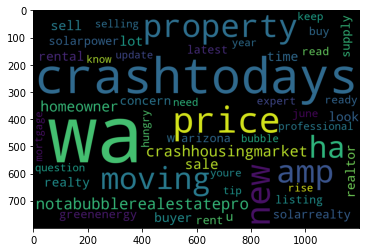

In [39]:
#creating wordcloud of most frequently used words when specific hashtag is searched
word_cloud= WordCloud(width=1200, height=800, max_words=50,collocations=False).generate(input_text)
plt.imshow(word_cloud)